In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tools import get_data
import seaborn as sns
import numpy as np

# Test 01 de Selección de Variables

* Tamaño de Muestra: 300 millones de datos
* N° de Bandas: 150
* N° de ROIs: 6

Definiciones:
 * Rango en el nivel de la Calidad: 1 - 5, donde 1 es alta calidad y 5 es baja calidad.
    * ROI B: Zona totalmente blanca.
    * ROI A y F: Zona con partes cuarteadas blancas.
    * ROI D: Zona parcialmente clara.
    * ROI C: Zona parcialmente obscura.
    * ROI E: Zona obscura.
 * Para efectos de la presente experimentación, asumiremos que la calidad alta del alimento se determina por una zona totalmente blanca y la calidad baja se determina por una zona tptalmente obscura.

In [2]:
path = "D:\\Documentos\\LUIS AUGUSTO\\UPN 2019-2\\Tesis\\Data\\test_01\\rois\\"

### Carga de Datos y Filtrado Inicial para datos entre la longitud de onda 400 y la banda 1000 (Bandas 49 - 124)

#### ROI A

In [3]:
A = get_data(path + 'A.roi.txt')
A.shape

(33992, 76)

#### ROI B

In [4]:
B = get_data(path + 'B.roi.txt')
B.shape

(36544, 76)

#### ROI C

In [5]:
C = get_data(path + 'C.roi.txt')
C.shape

(8244, 76)

#### ROI D

In [6]:
D = get_data(path + 'D.roi.txt')
D.shape

(54925, 76)

#### ROI E

In [7]:
E = get_data(path + 'E.roi.txt')
E.shape

(17494, 76)

#### ROI F

In [8]:
F = get_data(path + 'F.roi.txt')
F.shape

(34617, 76)

# Selección de Variables

In [9]:
from sklearn.feature_selection import SelectKBest, chi2

#### Clasificamos el nivel de calidad en base a una escala de 0 a 100 con saltos de 25 unidades y las asignamos como salida esperada para cada ROI.

In [11]:
y_A = np.ones(A.shape[0]) + 50
y_B = np.ones(B.shape[0])
y_C = np.ones(C.shape[0]) + 25
y_D = np.ones(D.shape[0]) + 75
y_E = np.ones(E.shape[0]) + 100
y_F = np.ones(F.shape[0]) + 50

#### Realizamos la selección de variables mediante la Prueba Gamma en función a la función Chi-2 y el Ranking de Variables

In [12]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit_A = bestfeatures.fit_transform(A,y_A)
fit_B = bestfeatures.fit_transform(B,y_B)
fit_C = bestfeatures.fit_transform(C,y_C)
fit_D = bestfeatures.fit_transform(D,y_D)
fit_E = bestfeatures.fit_transform(E,y_E)
fit_F = bestfeatures.fit_transform(F,y_F)

#### De las 10 Bandas escogidas para cada ROI, 6 serán utilizadas para los modelos de entrenamiento y 4 para testear el modelo.

In [14]:
fit_B.shape

(36544, 10)

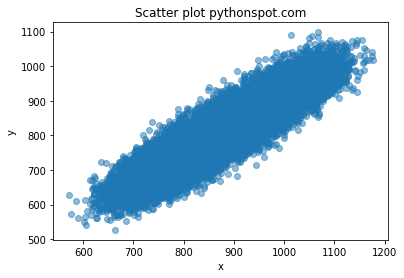

In [49]:
fit_A[:,0].shape
plt.scatter(fit_A[:,0], fit_A[:,2], alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')            
plt.show()

In [15]:
fit_C.shape

(8244, 10)

In [16]:
fit_D.shape

(54925, 10)

In [17]:
fit_E.shape

(17494, 10)

In [18]:
fit_F.shape

(34617, 10)

In [20]:
pd.DataFrame(fit_A).plot.scatter(x='length',()

,0,1,2,3,4,5,6,7,8,9
0,801,812,719,731,687,620,600,537,508,526
1,836,815,821,732,703,640,647,578,550,520
2,839,825,780,769,712,682,663,600,535,554
3,769,795,753,715,693,669,594,554,479,515
4,765,737,733,735,659,610,581,559,510,479
...,...,...,...,...,...,...,...,...,...,...
33987,783,700,647,628,613,618,539,557,485,493
33988,781,746,672,687,633,611,596,536,507,504
33989,808,710,725,670,666,648,590,614,536,494
33990,798,783,728,723,670,631,632,524,495,497


In [ ]:
11112448.